<a href="https://colab.research.google.com/github/Sherine-6600/Loan-Default/blob/main/Fintech_Capstone_Project_Loan_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center" width="50%" height="50%">
    <tr>
        <td width="100%">
            <img src="https://www.fisdom.com/wp-content/uploads/2019/08/Screenshot-2019-08-20-at-3.33.09-PM.png" >
        </td>
    </tr>
</table>

**Project Overview:**

***Loan Default Risk Analysis***

This project aims to develop a foundational understanding of risk analytics within the banking and financial services sector, focusing on loan defaults. By utilizing the provided dataset, we will explore various factors influencing loan defaults, such as loan type, purpose, and credit score.

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 1XHo39-OchVYEa-lkvT2SwwUWHQaJ0AX4

Downloading...
From: https://drive.google.com/uc?id=1XHo39-OchVYEa-lkvT2SwwUWHQaJ0AX4
To: /content/loan.csv
100% 16.3M/16.3M [00:00<00:00, 99.5MB/s]


# Reading the data

In [ ]:
df = pd.read_csv('/content/loan.csv')
df.head()

,ID,year,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,property_value,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status
0,24890,2019,cf,Sex Not Available,type1,p1,nob/c,116500,NaN,NaN,118000.0,pr,1740.0,EXP,758,CIB,25-34,98.728814,south,1
1,24891,2019,cf,Male,type2,p1,b/c,206500,NaN,NaN,NaN,pr,4980.0,EQUI,552,EXP,55-64,NaN,North,1
2,24892,2019,cf,Male,type1,p1,nob/c,406500,4.56,595.0,508000.0,pr,9480.0,EXP,834,CIB,35-44,80.019685,south,0
3,24893,2019,cf,Male,type1,p4,nob/c,456500,4.25,NaN,658000.0,pr,11880.0,EXP,587,CIB,45-54,69.376900,North,0
4,24894,2019,cf,Joint,type1,p1,nob/c,696500,4.00,0.0,758000.0,pr,10440.0,CRIF,602,EXP,25-34,91.886544,North,0


# Preview data

In [ ]:
df.shape

(148670, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        148670 non-null  int64  
 1   year                      148670 non-null  int64  
 2   loan_limit                145326 non-null  object 
 3   Gender                    148670 non-null  object 
 4   loan_type                 148670 non-null  object 
 5   loan_purpose              148536 non-null  object 
 6   business_or_commercial    148670 non-null  object 
 7   loan_amount               148670 non-null  int64  
 8   rate_of_interest          112231 non-null  float64
 9   Upfront_charges           109028 non-null  float64
 10  property_value            133572 non-null  float64
 11  occupancy_type            148670 non-null  object 
 12  income                    139520 non-null  float64
 13  credit_type               148670 non-null  o

In [ ]:
df.isna().sum()

,0
ID,0
year,0
loan_limit,3344
Gender,0
loan_type,0
loan_purpose,134
business_or_commercial,0
loan_amount,0
rate_of_interest,36439
Upfront_charges,39642


**Observations :**

There are missing values present in dataset.

Dataset has both numerical and string values.

In [ ]:
#Check statistical values for fields with numerical datatype
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,148670.0,99224.500000,42917.476598,24890.000000,62057.25000,99224.50000,136391.750000,173559.00
year,148670.0,2019.000000,0.000000,2019.000000,2019.00000,2019.00000,2019.000000,2019.00
loan_amount,148670.0,331117.743997,183909.310127,16500.000000,196500.00000,296500.00000,436500.000000,3576500.00
rate_of_interest,112231.0,4.045476,0.561391,0.000000,3.62500,3.99000,4.375000,8.00
Upfront_charges,109028.0,3224.996127,3251.121510,0.000000,581.49000,2596.45000,4812.500000,60000.00
property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,16508000.00
income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,578580.00
Credit_Score,148670.0,699.789103,115.875857,500.000000,599.00000,699.00000,800.000000,900.00
LTV,133572.0,72.746457,39.967603,0.967478,60.47486,75.13587,86.184211,7831.25
Status,148670.0,0.246445,0.430942,0.000000,0.00000,0.00000,0.000000,1.00


In [ ]:
#Check statistical values for fields with other than numerical datatype
df.describe(include='object').T

,count,unique,top,freq
loan_limit,145326,2,cf,135348
Gender,148670,4,Male,42346
loan_type,148670,3,type1,113173
loan_purpose,148536,4,p3,55934
business_or_commercial,148670,2,nob/c,127908
occupancy_type,148670,3,pr,138201
credit_type,148670,4,CIB,48152
co-applicant_credit_type,148670,2,CIB,74392
age,148470,7,45-54,34720
Region,148670,4,North,74722


# Helper function

In [ ]:
# Function to print basic useful details for a given column
def get_column_details(df,column):
    print("Details of",column,"column")

    #DataType of column
    print("\nDataType: ",df[column].dtype)

    #Check if null values are present
    count_null = df[column].isnull().sum()
    if count_null==0:
        print("\nThere are no null values")
    elif count_null>0:
        print("\nThere are ",count_null," null values")

    #Get Number of Unique Values
    print("\nNumber of Unique Values: ",df[column].nunique())

    #Get Distribution of Column
    print("\nDistribution of column:\n")
    print(df[column].value_counts())

In [ ]:
# Function to fill missing values using Mode of the column
def fill_missing_value_with_mode(df,column):
  df[column] = df[column].fillna(df[column].mode()[0])
  get_column_details(df,column)

# Preview column and Data cleaning

# ID

In [ ]:
get_column_details(df,'ID')

Details of ID column

DataType:  int64

There are no null values

Number of Unique Values:  148670

Distribution of column:

ID
24890     1
123979    1
123999    1
124000    1
124001    1
         ..
74447     1
74448     1
74449     1
74450     1
173559    1
Name: count, Length: 148670, dtype: int64


# year

In [ ]:
get_column_details(df,'year')

Details of year column

DataType:  int64

There are no null values

Number of Unique Values:  1

Distribution of column:

year
2019    148670
Name: count, dtype: int64


# loan_limit

In [ ]:
get_column_details(df,'loan_limit')

Details of loan_limit column

DataType:  object

There are  3344  null values

Number of Unique Values:  2

Distribution of column:

loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64


In [ ]:
fill_missing_value_with_mode(df,'loan_limit')

Details of loan_limit column

DataType:  object

There are no null values

Number of Unique Values:  2

Distribution of column:

loan_limit
cf     138692
ncf      9978
Name: count, dtype: int64


# Gender

In [ ]:
get_column_details(df,'Gender')

Details of Gender column

DataType:  object

There are no null values

Number of Unique Values:  4

Distribution of column:

Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64


# loan_type

In [ ]:
get_column_details(df,'loan_type')

Details of loan_type column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64


# loan_purpose

In [ ]:
get_column_details(df,'loan_purpose')

Details of loan_purpose column

DataType:  object

There are  134  null values

Number of Unique Values:  4

Distribution of column:

loan_purpose
p3    55934
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64


In [ ]:
fill_missing_value_with_mode(df,'loan_purpose')

Details of loan_purpose column

DataType:  object

There are no null values

Number of Unique Values:  4

Distribution of column:

loan_purpose
p3    56068
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64


# business_or_commercial

In [ ]:
get_column_details(df,'business_or_commercial')

Details of business_or_commercial column

DataType:  object

There are no null values

Number of Unique Values:  2

Distribution of column:

business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64


# loan_amount

In [ ]:
get_column_details(df,'loan_amount')

Details of loan_amount column

DataType:  int64

There are no null values

Number of Unique Values:  211

Distribution of column:

loan_amount
206500     4610
256500     4079
156500     3967
226500     3944
486500     3819
           ... 
2206500       1
1746500       1
2396500       1
3576500       1
1956500       1
Name: count, Length: 211, dtype: int64


# rate_of_interest

In [ ]:
get_column_details(df,'rate_of_interest')

Details of rate_of_interest column

DataType:  float64

There are  36439  null values

Number of Unique Values:  131

Distribution of column:

rate_of_interest
3.990    14455
3.625     8800
3.875     8592
3.750     8474
3.500     6866
         ...  
4.700        1
8.000        1
7.750        1
5.300        1
2.700        1
Name: count, Length: 131, dtype: int64


In [ ]:
fill_missing_value_with_mode(df,'rate_of_interest')

Details of rate_of_interest column

DataType:  float64

There are no null values

Number of Unique Values:  131

Distribution of column:

rate_of_interest
3.990    50894
3.625     8800
3.875     8592
3.750     8474
3.500     6866
         ...  
4.700        1
8.000        1
7.750        1
5.300        1
2.700        1
Name: count, Length: 131, dtype: int64


# Upfront_charges

In [ ]:
get_column_details(df,'Upfront_charges')

Details of Upfront_charges column

DataType:  float64

There are  39642  null values

Number of Unique Values:  58271

Distribution of column:

Upfront_charges
0.00       20770
1250.00     1184
1150.00      892
795.00       487
295.00       403
           ...  
4447.72        1
3173.84        1
3421.81        1
198.96         1
4323.33        1
Name: count, Length: 58271, dtype: int64


In [ ]:
fill_missing_value_with_mode(df,'Upfront_charges')

Details of Upfront_charges column

DataType:  float64

There are no null values

Number of Unique Values:  58271

Distribution of column:

Upfront_charges
0.00       60412
1250.00     1184
1150.00      892
795.00       487
295.00       403
           ...  
4447.72        1
3173.84        1
3421.81        1
198.96         1
4323.33        1
Name: count, Length: 58271, dtype: int64


# property_value

In [ ]:
get_column_details(df,'property_value')

Details of property_value column

DataType:  float64

There are  15098  null values

Number of Unique Values:  385

Distribution of column:

property_value
308000.0     2792
258000.0     2763
358000.0     2679
408000.0     2537
328000.0     2524
             ... 
4648000.0       1
3878000.0       1
5758000.0       1
2618000.0       1
2698000.0       1
Name: count, Length: 385, dtype: int64


In [ ]:
fill_missing_value_with_mode(df,'property_value')

Details of property_value column

DataType:  float64

There are no null values

Number of Unique Values:  385

Distribution of column:

property_value
308000.0     17890
258000.0      2763
358000.0      2679
408000.0      2537
328000.0      2524
             ...  
4648000.0        1
3878000.0        1
5758000.0        1
2618000.0        1
2698000.0        1
Name: count, Length: 385, dtype: int64


# occupancy_type

In [ ]:
get_column_details(df,'occupancy_type')

Details of occupancy_type column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

occupancy_type
pr    138201
ir      7340
sr      3129
Name: count, dtype: int64


# income

In [ ]:
get_column_details(df,'income')

Details of income column

DataType:  float64

There are  9150  null values

Number of Unique Values:  1001

Distribution of column:

income
0.0         1260
3600.0      1250
4200.0      1243
4800.0      1191
3120.0      1168
            ... 
45300.0        1
154440.0       1
137760.0       1
145560.0       1
79920.0        1
Name: count, Length: 1001, dtype: int64


In [ ]:
df.loc[df['income']==0.0,'income'] = np.nan

In [ ]:
fill_missing_value_with_mode(df,'income')

Details of income column

DataType:  float64

There are no null values

Number of Unique Values:  1000

Distribution of column:

income
3600.0     11660
4200.0      1243
4800.0      1191
3120.0      1168
3720.0      1161
           ...  
51300.0        1
53940.0        1
52200.0        1
47700.0        1
79920.0        1
Name: count, Length: 1000, dtype: int64


# credit_type

In [ ]:
get_column_details(df,'credit_type')

Details of credit_type column

DataType:  object

There are no null values

Number of Unique Values:  4

Distribution of column:

credit_type
CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: count, dtype: int64


# Credit_Score

In [ ]:
get_column_details(df,'Credit_Score')

Details of Credit_Score column

DataType:  int64

There are no null values

Number of Unique Values:  401

Distribution of column:

Credit_Score
763    415
867    413
639    411
581    408
554    407
      ... 
745    330
573    330
743    327
748    324
559    321
Name: count, Length: 401, dtype: int64


In [ ]:
df['Credit_Score_Bin'] = pd.cut(x=df['Credit_Score'],bins=[499,600,700,800,900],labels=['Poor','Fair','Good','Excellent'])

# co-applicant_credit_type

In [ ]:
get_column_details(df,'co-applicant_credit_type')

Details of co-applicant_credit_type column

DataType:  object

There are no null values

Number of Unique Values:  2

Distribution of column:

co-applicant_credit_type
CIB    74392
EXP    74278
Name: count, dtype: int64


# age

In [ ]:
get_column_details(df,'age')

Details of age column

DataType:  object

There are  200  null values

Number of Unique Values:  7

Distribution of column:

age
45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: count, dtype: int64


In [ ]:
fill_missing_value_with_mode(df,'age')

Details of age column

DataType:  object

There are no null values

Number of Unique Values:  7

Distribution of column:

age
45-54    34920
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: count, dtype: int64


# LTV

In [ ]:
get_column_details(df,'LTV')

Details of LTV column

DataType:  float64

There are  15098  null values

Number of Unique Values:  8484

Distribution of column:

LTV
81.250000    530
91.666667    499
80.038760    380
80.032468    328
94.956140    322
            ... 
33.598066      1
13.618746      1
55.981445      1
50.175070      1
32.802013      1
Name: count, Length: 8484, dtype: int64


In [ ]:
fill_missing_value_with_mode(df,'LTV')

Details of LTV column

DataType:  float64

There are no null values

Number of Unique Values:  8484

Distribution of column:

LTV
81.250000    15628
91.666667      499
80.038760      380
80.032468      328
94.956140      322
             ...  
33.598066        1
13.618746        1
55.981445        1
50.175070        1
32.802013        1
Name: count, Length: 8484, dtype: int64


# Region

In [ ]:
get_column_details(df,'Region')

Details of Region column

DataType:  object

There are no null values

Number of Unique Values:  4

Distribution of column:

Region
North         74722
south         64016
central        8697
North-East     1235
Name: count, dtype: int64


# Status

In [ ]:
get_column_details(df,'Status')

Details of Status column

DataType:  int64

There are no null values

Number of Unique Values:  2

Distribution of column:

Status
0    112031
1     36639
Name: count, dtype: int64


# Exploratory Data Analysis (EDA)

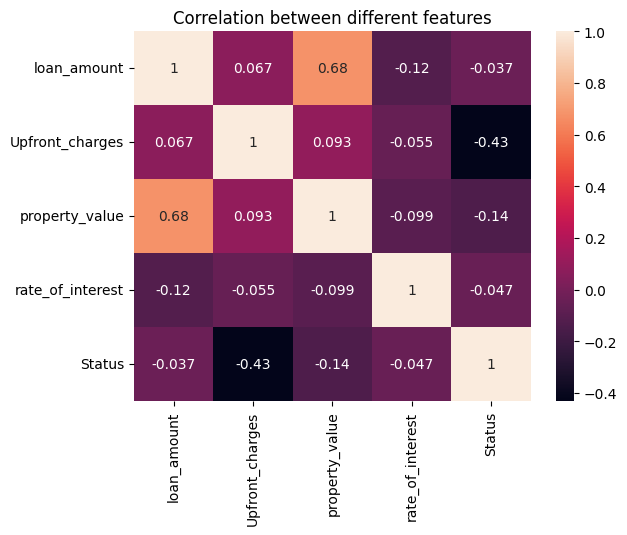

In [ ]:
corr_col = ['loan_amount','Upfront_charges','property_value','rate_of_interest','Status',]
plt.title('Correlation between different features')
sns.heatmap(df[corr_col].corr(),annot=True)
plt.show()

In [ ]:
pd.crosstab(df['Status'],df['credit_type'],margins=True)

credit_type,CIB,CRIF,EQUI,EXP,All
Status,,,,,
0,40542,36774,1,34714,112031
1,7610,7127,15297,6605,36639
All,48152,43901,15298,41319,148670


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


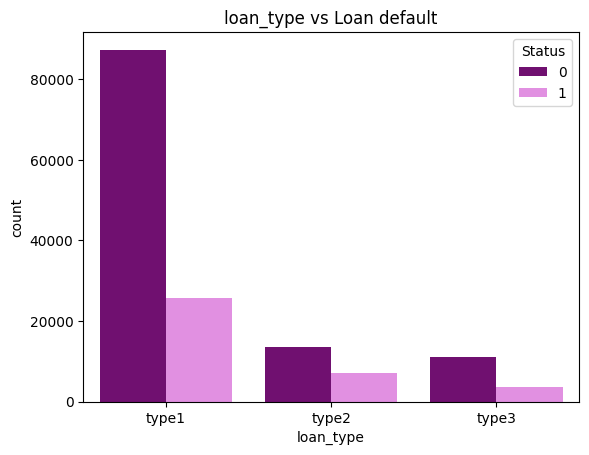

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


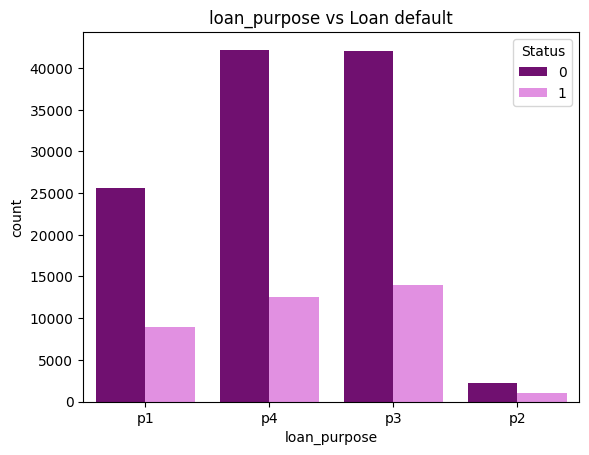

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


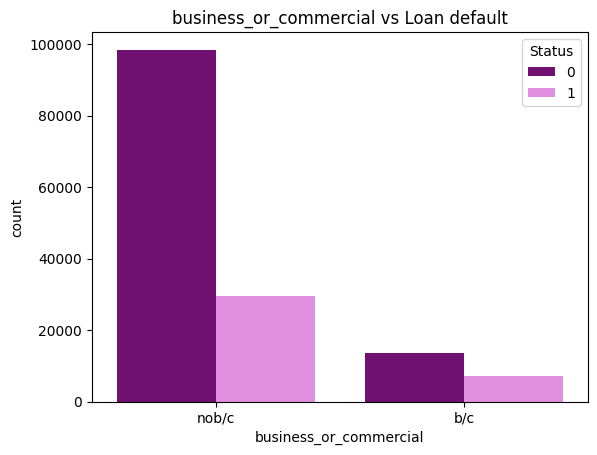

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


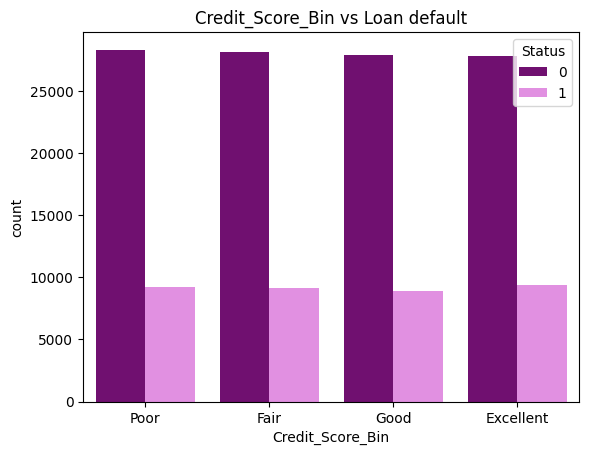

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


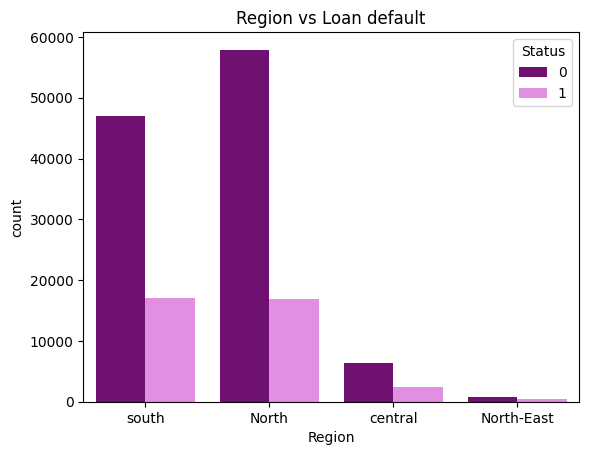

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


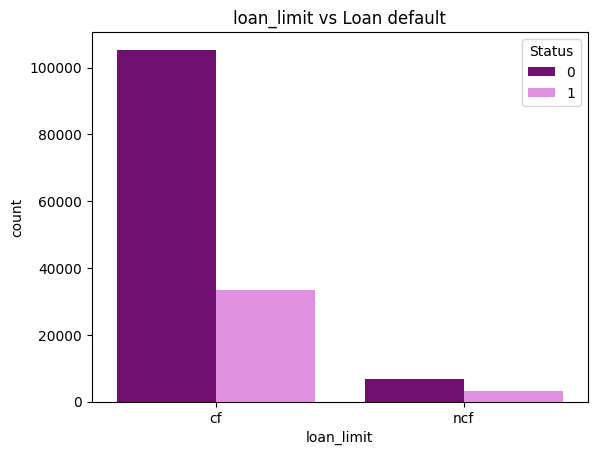

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


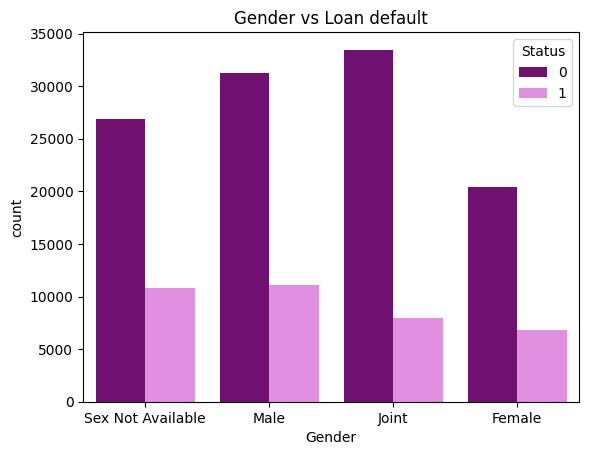

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


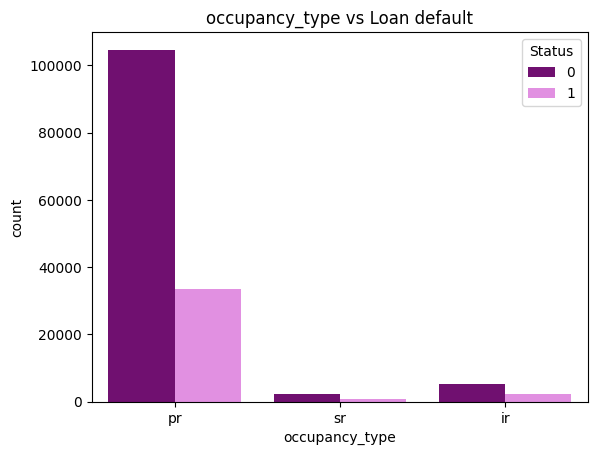

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


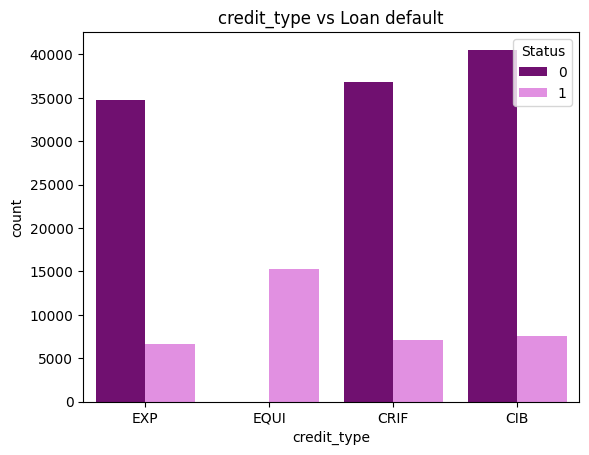

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


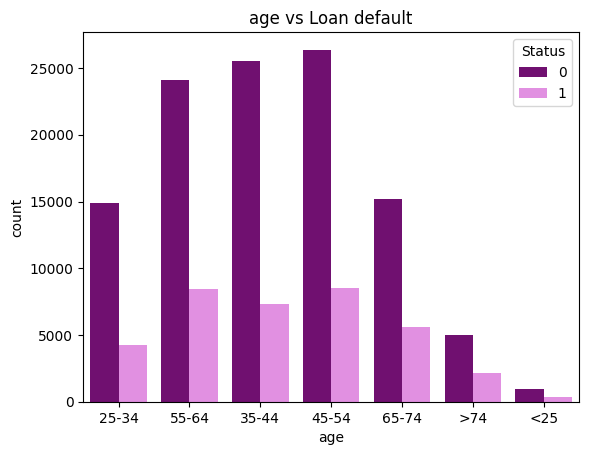

In [ ]:
catg_col = ['loan_type', 'loan_purpose','business_or_commercial','Credit_Score_Bin','Region','loan_limit','Gender','occupancy_type','credit_type','age']
for i in catg_col:
  plt.title(f"{i} vs Loan default")
  palette = {0: 'purple', 1: 'violet'}
  sns.countplot(x=i,hue='Status',data=df, palette=palette)
  plt.show()


# The Chi-squared test for independence

## loan_type

In [ ]:
pd.crosstab(df['Status'], df['loan_type'], margins=True)

loan_type,type1,type2,type3,All
Status,,,,
0,87398,13590,11043,112031
1,25775,7172,3692,36639
All,113173,20762,14735,148670


In [ ]:
# H0: Loan Default and Loan Type are independent
# Ha: Loan Default and Loan Type are not independent

from scipy.stats import chi2_contingency

observed = [
    [87398, 13590, 11043],
    [25775, 7172, 3692],]

chi_stat, p_value, dof, exp_freq = chi2_contingency(observed) # chi_stat, p_value, df, expected values
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",dof)
print("exp_freq:",exp_freq)

if p_value < 0.05:
    print("Reject the null hypothesis. Loan Default and Loan Type are not independent.")
else:
    print("Fail to reject the null hypothesis. Loan Default and Loan Type are independent.")

chi_stat: 1309.9581425319486
p_value: 3.5172528245412e-285
df: 2
exp_freq: [[85282.06338199 15645.30585861 11103.6307594 ]
 [27890.93661801  5116.69414139  3631.3692406 ]]
Reject the null hypothesis. Loan Default and Loan Type are not independent.


## loan_purpose

In [ ]:
pd.crosstab(df['Status'], df['loan_purpose'], margins=True)

loan_purpose,p1,p2,p3,p4,All
Status,,,,,
0,25594,2191,42037,42209,112031
1,8935,1083,14031,12590,36639
All,34529,3274,56068,54799,148670


In [ ]:
# H0: Loan Default and loan purpose are independent
# Ha: Loan Default and loan purpose are not independent

from scipy.stats import chi2_contingency

observed = [
    [25594,2191,41938,42209],
    [8935,1083,13996,12590],]

chi_stat, p_value, dof, exp_freq = chi2_contingency(observed) # chi_stat, p_value, df, expected values
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",dof)
print("exp_freq:",exp_freq)

if p_value < 0.05:
    print("Reject the null hypothesis. Loan Default and Loan purpose are not independent.")
else:
    print("Fail to reject the null hypothesis. Loan Default and Loan purpose are independent.")


chi_stat: 240.2138194797178
p_value: 8.555939611317792e-52
df: 3
exp_freq: [[26019.95494695  2467.18215113 42150.08138094 41294.78152098]
 [ 8509.04505305   806.81784887 13783.91861906 13504.21847902]]
Reject the null hypothesis. Loan Default and Loan purpose are not independent.


## business_or_commercial

In [ ]:
pd.crosstab(df['Status'], df['business_or_commercial'], margins=True)

business_or_commercial,b/c,nob/c,All
Status,,,
0,13590,98441,112031
1,7172,29467,36639
All,20762,127908,148670


In [ ]:
# H0: Loan Default and business_or_commercial are independent
# Ha: Loan Default and business_or_commercial are not independent

from scipy.stats import chi2_contingency

observed = [
    [13590,98441],
    [7172,29467],]

chi_stat, p_value, dof, exp_freq = chi2_contingency(observed) # chi_stat, p_value, df, expected values
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",dof)
print("exp_freq:",exp_freq)

if p_value < 0.05:
    print("Reject the null hypothesis. Loan Default and business_or_commerciale are not independent.")
else:
    print("Fail to reject the null hypothesis. Loan Default and business_or_commercial are independent.")

chi_stat: 1272.807997768186
p_value: 9.172191110451214e-279
df: 1
exp_freq: [[15645.30585861 96385.69414139]
 [ 5116.69414139 31522.30585861]]
Reject the null hypothesis. Loan Default and business_or_commerciale are not independent.


## Credit_Score_Bin

In [ ]:
pd.crosstab(df['Status'], df['Credit_Score_Bin'], margins=True)

Credit_Score_Bin,Poor,Fair,Good,Excellent,All
Status,,,,,
0,28303,28121,27837,27770,112031
1,9243,9126,8916,9354,36639
All,37546,37247,36753,37124,148670


In [ ]:
# H0: Loan Default and Credit Score Bin are independent
# Ha: Loan Default and Credit Score Bin are not independent

from scipy.stats import chi2_contingency

observed = [
    [28303,28121,27837,27770],
    [9243,9126,8916,9354],]

chi_stat, p_value, dof, exp_freq = chi2_contingency(observed) # chi_stat, p_value, df, expected values
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",dof)
print("exp_freq:",exp_freq)

if p_value < 0.05:
    print("Reject the null hypothesis. Loan Default and Credit Score Bin are not independent.")
else:
    print("Fail to reject the null hypothesis. Loan Default and Credit Score Bin are independent.")

chi_stat: 9.457216949669581
p_value: 0.02379088302117786
df: 3
exp_freq: [[28292.97051187 28067.65761082 27695.40151342 27974.97036389]
 [ 9253.02948813  9179.34238918  9057.59848658  9149.02963611]]
Reject the null hypothesis. Loan Default and Credit Score Bin are not independent.


## Region

In [ ]:
pd.crosstab(df['Status'], df['Region'], margins=True)

Region,North,North-East,central,south,All
Status,,,,,
0,57901,859,6302,46969,112031
1,16821,376,2395,17047,36639
All,74722,1235,8697,64016,148670


In [ ]:
# H0: Loan Default and Region are independent
# Ha: Loan Default and Region are not independent

from scipy.stats import chi2_contingency

observed = [
    [57901,859,6302,46969],
    [16821,376,2395,17047],]

chi_stat, p_value, dof, exp_freq = chi2_contingency(observed) # chi_stat, p_value, df, expected values
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",dof)
print("exp_freq:",exp_freq)

if p_value < 0.05:
    print("Reject the null hypothesis. Loan Default and Region are not independent.")
else:
    print("Fail to reject the null hypothesis. Loan Default and Region are independent.")

chi_stat: 380.45633008939643
p_value: 3.7860568405811336e-82
df: 3
exp_freq: [[56307.12572812   930.64024349  6553.6665568  48239.56747158]
 [18414.87427188   304.35975651  2143.3334432  15776.43252842]]
Reject the null hypothesis. Loan Default and Region are not independent.


## loan_limit

In [ ]:
pd.crosstab(df['Status'], df['loan_limit'], margins=True)

loan_limit,cf,ncf,All
Status,,,
0,105367,6664,112031
1,33325,3314,36639
All,138692,9978,148670


In [ ]:
# H0: Loan Default and loan limit are independent
# Ha: Loan Default and loan limit are not independent

from scipy.stats import chi2_contingency

observed = [
    [105367,6664],
    [33325,3314],]

chi_stat, p_value, dof, exp_freq = chi2_contingency(observed) # chi_stat, p_value, df, expected values
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",dof)
print("exp_freq:",exp_freq)

if p_value < 0.05:
    print("Reject the null hypothesis. Loan Default and loan limit are not independent.")
else:
    print("Fail to reject the null hypothesis. Loan Default and loan limit are independent.")

chi_stat: 422.3643530286387
p_value: 7.461399035455983e-94
df: 1
exp_freq: [[104512.02967646   7518.97032354]
 [ 34179.97032354   2459.02967646]]
Reject the null hypothesis. Loan Default and loan limit are not independent.


## Gender

In [ ]:
pd.crosstab(df['Status'], df['Gender'], margins=True)

Gender,Female,Joint,Male,Sex Not Available,All
Status,,,,,
0,20418,33466,31255,26892,112031
1,6848,7933,11091,10767,36639
All,27266,41399,42346,37659,148670


In [ ]:
# H0: Loan Default and Gender are independent
# Ha: Loan Default and Gender are not independent

from scipy.stats import chi2_contingency

observed = [
    [20418,33466,31255,26892],
    [6848,7933,11091,10767],]

chi_stat, p_value, dof, exp_freq = chi2_contingency(observed) # chi_stat, p_value, df, expected values
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",dof)
print("exp_freq:",exp_freq)

if p_value < 0.05:
    print("Reject the null hypothesis. Loan Default and Gender are not independent.")
else:
    print("Fail to reject the null hypothesis. Loan Default and Gender are independent.")

chi_stat: 1043.6008495787446
p_value: 6.2600483303596965e-226
df: 3
exp_freq: [[20546.42662272 31196.4173606  31910.03380642 28378.12221026]
 [ 6719.57337728 10202.5826394  10435.96619358  9280.87778974]]
Reject the null hypothesis. Loan Default and Gender are not independent.


## occupancy_type

In [ ]:
pd.crosstab(df['Status'], df['occupancy_type'], margins=True)

occupancy_type,ir,pr,sr,All
Status,,,,
0,5139,104612,2280,112031
1,2201,33589,849,36639
All,7340,138201,3129,148670


In [ ]:
# H0: Loan Default and occupancy type are independent
# Ha: Loan Default and occupancy type are not independent

from scipy.stats import chi2_contingency

observed = [
    [5139,104612,2280],
    [2201,33589,849],]

chi_stat, p_value, dof, exp_freq = chi2_contingency(observed) # chi_stat, p_value, df, expected values
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",dof)
print("exp_freq:",exp_freq)

if p_value < 0.05:
    print("Reject the null hypothesis. Loan Default and occupancy type are not independent.")
else:
    print("Fail to reject the null hypothesis. Loan Default and occupancy type are independent.")

chi_stat: 131.8253589953989
p_value: 2.368574267249256e-29
df: 2
exp_freq: [[  5531.09262124 104142.03424363   2357.87313513]
 [  1808.90737876  34058.96575637    771.12686487]]
Reject the null hypothesis. Loan Default and occupancy type are not independent.


## credit_type

In [ ]:
pd.crosstab(df['Status'], df['credit_type'], margins=True)

credit_type,CIB,CRIF,EQUI,EXP,All
Status,,,,,
0,40542,36774,1,34714,112031
1,7610,7127,15297,6605,36639
All,48152,43901,15298,41319,148670


In [ ]:
# H0: Loan Default and credit type are independent
# Ha: Loan Default and credit type are not independent

from scipy.stats import chi2_contingency

observed = [
    [40542,36774,1,34714],
    [7610,7127,15297,6605],]

chi_stat, p_value, dof, exp_freq = chi2_contingency(observed) # chi_stat, p_value, df, expected values
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",dof)
print("exp_freq:",exp_freq)

if p_value < 0.05:
    print("Reject the null hypothesis. Loan Default and credit type are not independent.")
else:
    print("Fail to reject the null hypothesis. Loan Default and credit type are independent.")

chi_stat: 52135.280704971796
p_value: 0.0
df: 3
exp_freq: [[36285.17328311 33081.81160288 11527.88214166 31136.13297235]
 [11866.82671689 10819.18839712  3770.11785834 10182.86702765]]
Reject the null hypothesis. Loan Default and credit type are not independent.


## age

In [ ]:
pd.crosstab(df['Status'], df['age'], margins=True)


age,25-34,35-44,45-54,55-64,65-74,<25,>74,All
Status,,,,,,,,
0,14894,25509,26371,24112,15173,950,5022,112031
1,4248,7309,8549,8422,5571,387,2153,36639
All,19142,32818,34920,32534,20744,1337,7175,148670


In [ ]:
# H0: Loan Default and age are independent
# Ha: Loan Default and age are not independent

from scipy.stats import chi2_contingency

observed = [
    [14894,25509,26371,24112,15173,950,5022],
    [4248,7309,8549,8422,5571,387,2153],]

chi_stat, p_value, dof, exp_freq = chi2_contingency(observed) # chi_stat, p_value, df, expected values
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",dof)
print("exp_freq:",exp_freq)

if p_value < 0.05:
    print("Reject the null hypothesis. Loan Default and age are not independent.")
else:
    print("Fail to reject the null hypothesis. Loan Default and age are independent.")

chi_stat: 368.1014338529513
p_value: 2.001490250998745e-76
df: 6
exp_freq: [[14424.5469967  24730.16316675 26314.13546781 24516.15358848
  15631.74187126  1007.5028385   5406.75607049]
 [ 4717.4530033   8087.83683325  8605.86453219  8017.84641152
   5112.25812874   329.4971615   1768.24392951]]
Reject the null hypothesis. Loan Default and age are not independent.


# Label encoding Features

In [ ]:
df['loan_type_label'] = df['loan_type'].replace({'type1':1, 'type2':3, 'type3':2})

<ipython-input-224-1194290f6cd7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['loan_type_label'] = df['loan_type'].replace({'type1':1, 'type2':3, 'type3':2})


In [ ]:
df['loan_purpose_label'] = df['loan_purpose'].replace({'p1':2, 'p2':3, 'p3':2, 'p4':1})

<ipython-input-225-af651cec3f1b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['loan_purpose_label'] = df['loan_purpose'].replace({'p1':2, 'p2':3, 'p3':2, 'p4':1})


In [ ]:
df['age_label'] = df['age'].replace({'<25':5 ,'25-34':1 , '35-44':1 ,'45-54':2 ,'55-64':3 ,'65-74':4 ,'>74':5 })

<ipython-input-226-a26775cbc79f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age_label'] = df['age'].replace({'<25':5 ,'25-34':1 , '35-44':1 ,'45-54':2 ,'55-64':3 ,'65-74':4 ,'>74':5 })


In [ ]:
df['business_or_commercial_label'] = df['business_or_commercial'].replace({'nob/c':1, 'b/c':2})

<ipython-input-227-3af0dff72fe1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['business_or_commercial_label'] = df['business_or_commercial'].replace({'nob/c':1, 'b/c':2})


In [ ]:
df['Region_label'] = df['Region'].replace({'North':2, 'south':3, 'central':3 , 'North-East':4})

<ipython-input-228-49f96d6e525d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Region_label'] = df['Region'].replace({'North':2, 'south':3, 'central':3 , 'North-East':4})


In [ ]:
df['loan_limit_label'] = df['loan_limit'].replace({'cf':1, 'ncf':2})

<ipython-input-229-16e28c7eb3a6>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['loan_limit_label'] = df['loan_limit'].replace({'cf':1, 'ncf':2})


In [ ]:
df['occupancy_type_label'] = df['occupancy_type'].replace({'pr':1, 'ir':3, 'sr':2})

<ipython-input-230-377b1000577b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['occupancy_type_label'] = df['occupancy_type'].replace({'pr':1, 'ir':3, 'sr':2})


In [ ]:
df['credit_type_label'] = df['credit_type'].replace({'CIB':1, 'CRIF':1, 'EXP':2 , 'EQUI':4})

<ipython-input-231-e6c7ecfffc14>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['credit_type_label'] = df['credit_type'].replace({'CIB':1, 'CRIF':1, 'EXP':2 , 'EQUI':4})


# *Feature Engineering*

**The following could be potential risk factors:**

1.**Loan Amount:** Higher amounts might be riskier.

2.**Rate of Interest:** Higher rates could indicate riskier loans.

3.**LTV (Loan-to-Value Ratio):** A higher ratio indicates higher risk.

4.**Credit Score:** Lower scores correlate with higher risk.

5.**Debt to Income:** Lower income may indicate potential repayment difficulties.

6.**Age:** Age can provide insights into financial stability and experience.

7.**Loan Purpose, Loan Type, Loan limit, Region, Occupancy and Credit type:** Certain purposes may be riskier than others.

8.**Upfront Charges:** A low down payment can indicate higher risk.

## Debt to Income Ratio

In [ ]:
# Calculating Debt to Income ratio
df['Debt_to_Income_Ratio'] = df['loan_amount'] / df['income']

# Normalization of Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['loan_amount', 'rate_of_interest', 'LTV', 'Credit_Score', 'Debt_to_Income_Ratio','Upfront_charges']] = scaler.fit_transform(
    df[['loan_amount', 'rate_of_interest', 'LTV', 'Credit_Score', 'Debt_to_Income_Ratio','Upfront_charges']]
)

# Calculate Risk Score

In [ ]:
weights = {
    'loan_amount': 0.09,                 # Higher amounts are riskier
    'rate_of_interest': 0.09,            # Higher rates may indicate higher risk
    'LTV': 0.25,                         # High LTV is a strong indicator of risk
    'Credit_Score': -0.25,               # Higher scores mean lower risk (negative weight)
    'Debt_to_Income_Ratio': 0.09,        # High ratio indicates financial strain
    'Upfront_charges': 0.09,             # Lower upfront means higher risk
    'loan_type_label': 0.09,             # Weight based on risk associated with types
    'loan_purpose_label': 0.09,          # Risk may vary by purpose
    'age_label': 0.01,                   # Varies by age group
    'business_or_commercial_label': 0.09,# Commercial loans carry less risk
    'Region_label': 0.09,                # Regions may have varying economic conditions
    'loan_limit_label': 0.09,            # Fixed limits might be less risky
    'occupancy_type_label': 0.09,        # Varies by occupancy type
    'credit_type_label': 0.09           # Varies by type
}

In [ ]:
df['risk_score'] = (
    weights['loan_amount'] * df['loan_amount'] +
    weights['rate_of_interest'] * df['rate_of_interest'] +
    weights['LTV'] * df['LTV'] +
    weights['Credit_Score'] * df['Credit_Score'] +
    weights['Debt_to_Income_Ratio'] * df['Debt_to_Income_Ratio'] +
    weights['Upfront_charges'] * df['Upfront_charges'] +
	  weights['loan_type_label'] * df['loan_type_label'] +
	  weights['loan_purpose_label'] * df['loan_purpose_label'] +
    weights['age_label'] * df['age_label'] +
    weights['business_or_commercial_label'] * df['business_or_commercial_label'] +
    weights['Region_label'] * df['Region_label'] +
    weights['loan_limit_label'] * df['loan_limit_label'] +
    weights['occupancy_type_label'] * df['occupancy_type_label'] +
    weights['credit_type_label'] * df['credit_type_label']
)

In [ ]:
#min-max normalization
df['risk_score_norm'] = (df['risk_score'] - df['risk_score'].min()) / (df['risk_score'].max() - df['risk_score'].min())

In [ ]:
df['risk_score_norm'].describe()

,risk_score_norm
count,148670.000000
mean,0.323382
std,0.145159
min,0.000000
25%,0.216809
50%,0.304686
75%,0.414341
max,1.000000


In [ ]:
def classify_risk(score):
    if score < 0.30:
        return 'Informational'
    elif score < 0.50:
        return 'Low'
    elif score < 0.70:
        return 'Medium'
    elif score < 0.85:
        return 'High'
    else:
        return 'Critical'

# Apply the classification
df['risk_category'] = df['risk_score_norm'].apply(classify_risk)

In [ ]:
df['risk_category'].value_counts()

,count
risk_category,
Informational,72229
Low,57525
Medium,17241
High,1568
Critical,107


In [ ]:
pd.crosstab(df['Status'],df['risk_category'],margins=True)

risk_category,Critical,High,Informational,Low,Medium,All
Status,,,,,,
0,0,145,62245,41631,8010,112031
1,107,1423,9984,15894,9231,36639
All,107,1568,72229,57525,17241,148670


In [ ]:
# Create the crosstab DataFrame
data = {
    'Informational': [62245, 9984, 72229],
    'Low': [41631, 15894, 57525],
    'Medium': [8010, 9231, 17241],
    'High': [145, 1423, 1568],
    'Critical': [0, 107, 107],
}
index = ['0', '1', 'All']
df_prob = pd.DataFrame(data, index=index)

# Display the original crosstab
print("Original Crosstab:")
print(df_prob)

# Calculate probabilities
# Divide each count by the total count in the "All" row
probabilities = df_prob.div(df_prob.loc['All'], axis=1) * 100

# Display the probabilities
print("\nProbabilities:")
print(probabilities)


Original Crosstab:
     Informational    Low  Medium  High  Critical
0            62245  41631    8010   145         0
1             9984  15894    9231  1423       107
All          72229  57525   17241  1568       107

Probabilities:
     Informational         Low      Medium        High  Critical
0        86.177297   72.370274   46.459022    9.247449       0.0
1        13.822703   27.629726   53.540978   90.752551     100.0
All     100.000000  100.000000  100.000000  100.000000     100.0


# **Summary of Risk Category Effectiveness**

**Loan Defaulters:**

1. The risk category has effectively classified 100% of
defaulters in the "Critical" risk category.

2. Additionally, it has classified 90.75% of defaulters in the "High" category.

**Non-Defaulters:**

1. 86.17% of non-defaulters have been classified in the "Informational" category.

2. 72.37% are classified in the "Low" risk category.